In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as K

In [3]:
dataset = fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
y = dataset.target
X = dataset.data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

model = K.Sequential([
    K.layers.BatchNormalization(input_shape=(8,)),
    K.layers.Dense(units=8, activation="softplus", kernel_regularizer="l1"),
    K.layers.Dense(units=1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=8)

predicts = model.predict(X_test)

Epoch 1/8
433/433 [==============================] - 2s 2ms/step - loss: 0.8284
Epoch 2/8
433/433 [==============================] - 1s 2ms/step - loss: 0.6491
Epoch 3/8
433/433 [==============================] - 1s 2ms/step - loss: 0.6159
Epoch 4/8
433/433 [==============================] - 1s 2ms/step - loss: 0.5898
Epoch 5/8
433/433 [==============================] - 1s 2ms/step - loss: 0.5817
Epoch 6/8
433/433 [==============================] - 1s 2ms/step - loss: 0.5609
Epoch 7/8
433/433 [==============================] - 1s 2ms/step - loss: 0.5631
Epoch 8/8
213/213 [==============================] - 0s 467us/step


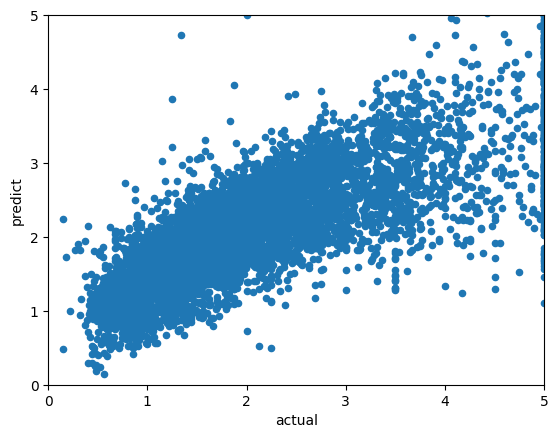

In [5]:
result = pd.DataFrame({
    "predict": np.reshape(predicts, (-1,)),
    "actual": y_test
})
limit = np.max(y_test)

result.plot.scatter(x="actual", y="predict", xlim=(0, limit), ylim=(0, limit))
plt.show()